# DA Practice 1: Data Science Salaries


[Data modeling](https://en.wikipedia.org/wiki/Data_modeling) is a crucial process in information management that involves the creation of a conceptual, logical, and physical representation of data. It provides a structured approach for organizing and storing data in a database, enabling efficient access and retrieval of information. Effective data modeling ensures the accuracy, consistency, and integrity of data by establishing clear relationships between data elements and defining their attributes.

In this report, I will provide an overview of data modeling, including its importance, process, and techniques used in developing a data model. I will then demonstrate the application of data modeling by using a dataset that the teacher sent from kaggle. Additionally, I will explain the steps involved in the data modeling process. This is to cover modeling aspects that I can still imporve on.

## Data set

Throughout this notebook I will work on the **Data Science Salaries 2023 dataset**. This dataset contains information about salaries of different data science fields in the data science domain. https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## Problem definition

**Research question: How do we build a model that is able to predict the salary?**

The main focus of this project is to build a model that is able to predict the salary, this is done using a few feature columns related to salary (salary, salary in USD, salary currency)

Other questions to answer:

How should you deal with data cleaning? 
How to deal with the job titles?
How to deal with the many countries?
Which is the best hyper-parameters for the decision tree?

## Loading the libraries

I load some Data Analytics libraries first:

In [2]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns  # also improves the look of plots
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

Now, I selectively import the relevant classes and functions from `sklearn`
[(_SciKit Learn_, a Python library for machine learning)](http://scikit-learn.org/.)

In [3]:
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split

## Getting to know the data

Salaries of Different Data Science Fields in the Data Science Domain

In [4]:
df_salaries = pd.read_csv('Data/ds_salaries.csv')
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
df_salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Data Science Job Salaries Dataset contains 11 columns, each are:

    work_year: The year the salary was paid.
    experience_level: The experience level in the job during the year
    employment_type: The type of employment for the role
    job_title: The role worked in during the year.
    salary: The total gross salary amount paid.
    salary_currency: The currency of the salary paid as an ISO 4217 currency code.
    salaryinusd: The salary in USD
    employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    remote_ratio: The overall amount of work done remotely
    company_location: The country of the employer's main office or contracting branch
    company_size: The median number of people that worked for the company during the year

The size of the dataset is 3755 x 11

In [6]:
df_salaries.shape

(3755, 11)

The dataset columns are the following types:

In [7]:
df_salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Data Cleaning

The next step I plan to take is to look at different columns and identify any possible inconsistencies.

In [8]:
company_size = df_salaries['company_size'].unique()
company_size

array(['L', 'S', 'M'], dtype=object)

In [9]:
jobs = df_salaries['job_title'].unique()
jobs.sort()
jobs

array(['3D Computer Vision Researcher', 'AI Developer', 'AI Programmer',
       'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Scientist',
       'Autonomous Vehicle Technician', 'Azure Data Engineer',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Engineer',
       'Business Data Analyst', 'Business Intelligence Engineer',
       'Cloud Data Architect', 'Cloud Data Engineer',
       'Cloud Database Engineer', 'Compliance Data Analyst',
       'Computer Vision Engineer', 'Computer Vision Software Engineer',
       'Data Analyst', 'Data Analytics Consultant',
       'Data Analytics Engineer', 'Data Analytics Lead',
       'Data Analytics Manager', 'Data Analytics Specialist',
       'Data Architect', 'Data DevOps Engineer', 'Data Engineer',
       'Data Infrastructure Engineer', 'Data Lead',
       'Data Ma

In [10]:
experience_level = df_salaries['experience_level'].unique()
experience_level

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [11]:
employment_type = df_salaries['employment_type'].unique()
employment_type

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

I was looking at some column values and I wasn't sure what they meant, so I went and found out their meanings. I am going to rename some of the column values for better understanding.

In [12]:
df_salaries['experience_level'] = df_salaries['experience_level'].replace('EN','Entry-level')
df_salaries['experience_level'] = df_salaries['experience_level'].replace('MI','Mid-level')
df_salaries['experience_level'] = df_salaries['experience_level'].replace('SE','Senior-level')
df_salaries['experience_level'] = df_salaries['experience_level'].replace('EX','Executive-level')

df_salaries['employment_type'] = df_salaries['employment_type'].replace('FL','Freelancer')
df_salaries['employment_type'] = df_salaries['employment_type'].replace('CT','Contractor')
df_salaries['employment_type'] = df_salaries['employment_type'].replace('FT','Full-Time')
df_salaries['employment_type'] = df_salaries['employment_type'].replace('PT','Part-Time')


df_salaries['company_size'] = df_salaries['company_size'].replace('S','Small')
df_salaries['company_size'] = df_salaries['company_size'].replace('M','Medium')
df_salaries['company_size'] = df_salaries['company_size'].replace('L','Large')

I have checked for null values, and it appears that there are no null values in this dataset.

In [13]:
df_salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**How to deal with the job titles?**

One approach is to introducing fewer hand-made categories. By reducing the number of job titles the model needs to work with, we can improve the model's predictive ability.

In [14]:
def segment_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist', 'Principal Data Analyst', 'Principal Data Engineer']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']
    
    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'

In [15]:
df_salaries['job_title'] = df_salaries['job_title'].apply(segment_job_title)

**How to deal with the many countries?**
I'm going to use the same approach as before and categorize countries by continent to reduce their number.

In [16]:
def segment_countries(country):
    africa = ['DZ', 'NG', 'TN', 'MA']
    asia = ['AE', 'AM', 'CN', 'HK', 'ID', 'IL', 'IN', 'IQ', 'IR', 'JP', 'KE', 'KW', 'MY', 'PK', 'PH', 'SG', 'TH', 'TR', 'UZ', 'VN']
    europe = ['AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HR', 'HU', 'IE', 'IT', 'JE', 'LT', 'LU', 'LV', 'MD', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'RU', 'SE', 'SI', 'SK', 'UA']
    north_america = ['BS', 'CA', 'CR', 'DO', 'HN', 'MX', 'PR', 'US']
    oceania = ['AU', 'NZ']
    south_america = ['AR', 'BO', 'BR', 'CL', 'CO', 'PE']

    if country in africa:
        return 'Africa'
    elif country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in oceania:
        return 'Oceania'
    elif country in south_america:
        return 'South America'
    else:
        return 'Uncategorized'

In [17]:
df_salaries['employee_residence'] = df_salaries['employee_residence'].apply(segment_countries)
df_salaries['company_location'] = df_salaries['company_location'].apply(segment_countries)

## Data Preprocessing

Before I'm going to modify the data for the model, I'm going to make a copy that we can use for data exploration.

In [18]:
df_salaries_copy = df_salaries.copy()
df_salaries_copy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-Time,Data Scientist,80000,EUR,85847,Europe,100,Europe,Large
1,2023,Mid-level,Contractor,Machine Learning Engineer,30000,USD,30000,North America,100,North America,Small
2,2023,Mid-level,Contractor,Machine Learning Engineer,25500,USD,25500,North America,100,North America,Small
3,2023,Senior-level,Full-Time,Data Scientist,175000,USD,175000,North America,100,North America,Medium
4,2023,Senior-level,Full-Time,Data Scientist,120000,USD,120000,North America,100,North America,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-level,Full-Time,Data Scientist,412000,USD,412000,North America,100,North America,Large
3751,2021,Mid-level,Full-Time,Data Scientist,151000,USD,151000,North America,100,North America,Large
3752,2020,Entry-level,Full-Time,Data Scientist,105000,USD,105000,North America,100,North America,Small
3753,2020,Entry-level,Contractor,Data Analyst,100000,USD,100000,North America,100,North America,Large


**Categorical features**

One way to deal with categorical features is to encode them. This is done with OneHotEncoder in my case because it's the best approach in this context.

In [19]:
categorical_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
encoder = OneHotEncoder()
encoded_data = pd.DataFrame(encoder.fit_transform(df_salaries[categorical_vars]).toarray(), columns=encoder.get_feature_names_out(categorical_vars))

With the encoded categorical features, now I'm going to merge the numerical and encoded categorical variables.

In [20]:
processed_data = pd.concat([encoded_data, df_salaries[['work_year', 'salary_in_usd', 'remote_ratio']]], axis=1)

In [21]:
processed_data = processed_data.drop('salary_in_usd', axis=1)
processed_data

,experience_level_Entry-level,experience_level_Executive-level,experience_level_Mid-level,experience_level_Senior-level,employment_type_Contractor,employment_type_Freelancer,employment_type_Full-Time,employment_type_Part-Time,job_title_Business Intelligence and Analytics,job_title_Data Analyst,...,company_location_Europe,company_location_North America,company_location_Oceania,company_location_South America,company_location_Uncategorized,company_size_Large,company_size_Medium,company_size_Small,work_year,remote_ratio
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023,100
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2023,100
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2023,100
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,100
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100
3751,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2021,100
3752,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,100
3753,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,100


## Data Exploration

This is where I will try to analyze the data and find interesting facts. I'm going to see what is the average salary for each categorical feature that I plot. In order to choose what plot is most suitable for visualization I made use of a [webiste](https://www.data-to-viz.com/) that helps you in finding the best plot for your data. I have decided to use barplots in multiple instances because I want to maintain consistency throughout the document.

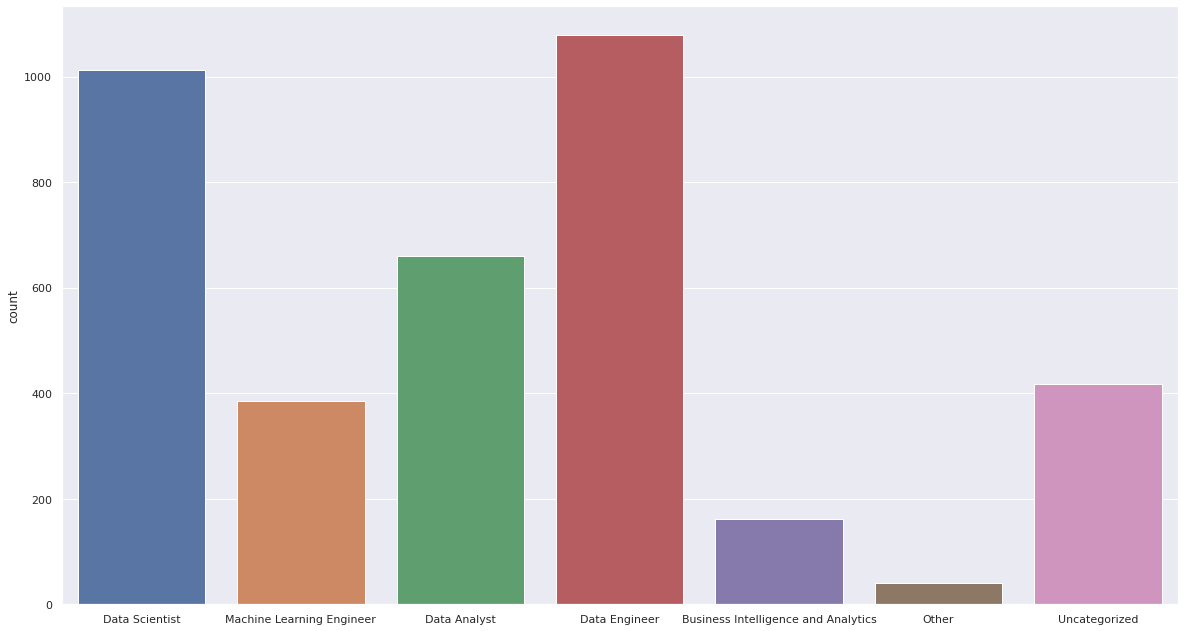

In [22]:
jobs = ['Data Scientist', 'Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Business Intelligence and Analytics', 'Other', 'Uncategorized']
counts = df_salaries['job_title'].value_counts().reindex(jobs, fill_value=0)

plt.figure(figsize=(20, 11))
sns.barplot(x=jobs, y=counts)
plt.show()

This bar plot shows that most of professionals are working as data engineers followed by data scientists and others jobs.

Now I will try to see what is the mean for each job.

In [23]:
df_salaries['salary_in_usd'].groupby(df_salaries['job_title']).mean().sort_values()

job_title
Data Analyst                           105899.075873
Uncategorized                          140142.287081
Data Engineer                          141783.515292
Data Scientist                         145314.346838
Other                                  148476.878049
Business Intelligence and Analytics    149800.913043
Machine Learning Engineer              150550.171429
Name: salary_in_usd, dtype: float64

Although most people work as data engineers, the highest paid position overall is that of a machine learning engineer. While there is not a significant gap between salaries for different positions, data analysts tend to earn less compared to other categories.

Now I'm going to find out what are most professionals expirience level?

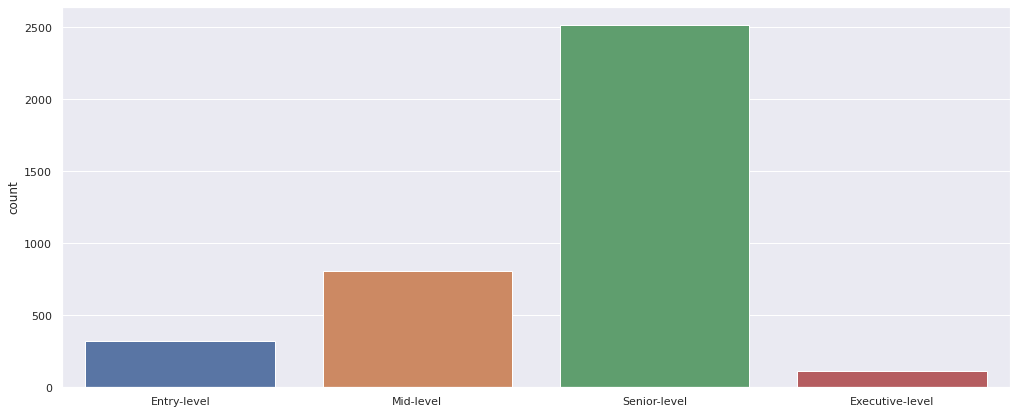

In [24]:
levels = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']
counts = df_salaries['experience_level'].value_counts().reindex(levels, fill_value=0)

plt.figure(figsize=(17, 7))
sns.barplot(x=levels, y=counts)
plt.show()

Also would be intresting to know what are the highest paid in general.

In [25]:
df_salaries.groupby('experience_level')['salary_in_usd'].mean().sort_values()

experience_level
Entry-level         78546.284375
Mid-level          104525.939130
Senior-level       153051.071542
Executive-level    194930.929825
Name: salary_in_usd, dtype: float64

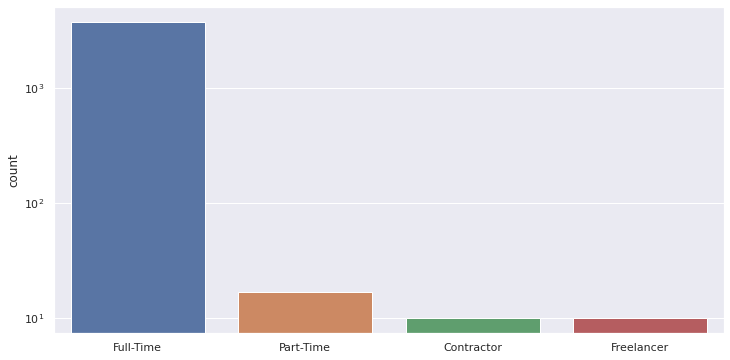

In [26]:
employment_type = ['Full-Time', 'Part-Time', 'Contractor', 'Freelancer']
counts = df_salaries['employment_type'].value_counts().reindex(employment_type, fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=employment_type, y=counts)
plt.yscale('log')
plt.show()

In [27]:
df_salaries.groupby('employment_type')['salary_in_usd'].mean().sort_values()

employment_type
Part-Time      39533.705882
Freelancer     51807.800000
Contractor    113446.900000
Full-Time     138314.199570
Name: salary_in_usd, dtype: float64

<AxesSubplot:ylabel='count'>

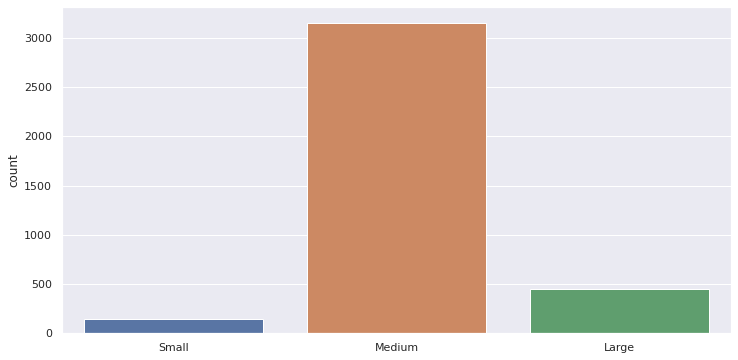

In [28]:
company_size = ['Small', 'Medium', 'Large']
counts = df_salaries['company_size'].value_counts().reindex(company_size, fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=company_size, y=counts)

In [29]:
df_salaries.groupby('company_size')['salary_in_usd'].mean().sort_values()

company_size
Small      78226.682432
Large     118300.982379
Medium    143130.548367
Name: salary_in_usd, dtype: float64

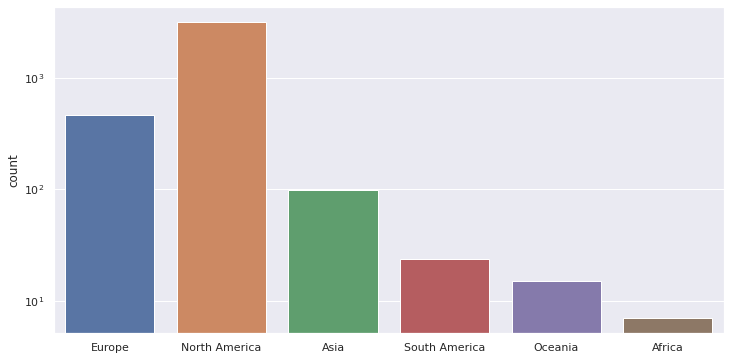

In [30]:
company_location = ['Europe', 'North America', 'Asia', 'South America', 'Oceania', 'Africa']
counts = df_salaries['company_location'].value_counts().reindex(company_location, fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=company_location, y=counts)
plt.yscale('log')
plt.show()

In [31]:
df_salaries.groupby('company_location')['salary_in_usd'].mean().sort_values()

company_location
Uncategorized     31153.000000
South America     41294.583333
Asia              45660.696970
Africa            71428.571429
Europe            74790.810458
Oceania           83031.200000
North America    151009.164758
Name: salary_in_usd, dtype: float64

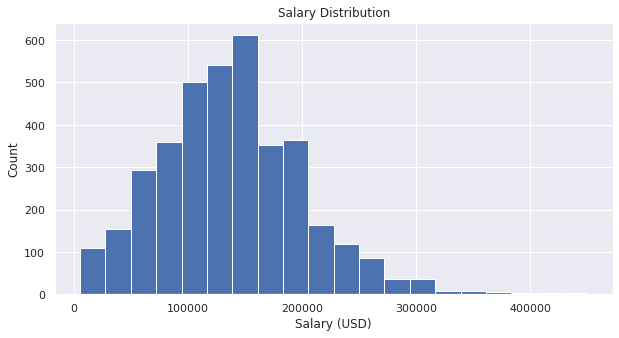

In [32]:
plt.hist(df_salaries['salary_in_usd'], bins=20)
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.title('Salary Distribution')
plt.show()

## Data Modeling

For this data and problem, we are advised to use a decision decision tree. The next question that we have to answer is how to find the best hyperparameters. To answer this question, we can make use of a grid search with cross-validation using scikit-learn library. Grid search with cross-validation is a common technique for hyperparameter tuning, which involves searching over a specified range of hyperparameter values and evaluating the model's performance on a validation set using k-fold cross-validation. The combination of hyperparameter values that yields the best performance is then selected as the optimal hyperparameters for the model. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Select the data

Let's try to predict `salary_in_usd` by training a decision tree classifier on the data.

### Train-Test split

X contains the releveant features for this prediction, later we are going to find out what are the most important features

In [33]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, df_salaries['salary_in_usd'], test_size=0.2, random_state=0)
X_train.head(5)

,experience_level_Entry-level,experience_level_Executive-level,experience_level_Mid-level,experience_level_Senior-level,employment_type_Contractor,employment_type_Freelancer,employment_type_Full-Time,employment_type_Part-Time,job_title_Business Intelligence and Analytics,job_title_Data Analyst,...,company_location_Europe,company_location_North America,company_location_Oceania,company_location_South America,company_location_Uncategorized,company_size_Large,company_size_Medium,company_size_Small,work_year,remote_ratio
1084,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,100
710,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,0
2955,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022,100
2526,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2022,0
2204,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2022,0


### Decision-tree classifier

Next, we create the _decision-tree object_ for **decision tree mining**,
and store it in the variable `tree`.

In [34]:
tree = DecisionTreeRegressor()
tree

DecisionTreeRegressor()

### Fitting the model

Invoke the **`fit()`** function of the decision-tree object,
supplying the selected data

In [35]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### Extract model parameters

In case of decision tree mining, there are relevant attributes of the decision-tree.

In [36]:
tree.tree_.node_count, tree.tree_.max_depth

(1043, 20)

### Features importance

The decision tree model assigns an importance score to each feature based on how much it contributes to the model's prediction accuracy. To better understand which features are the most important in predicting salaries, I am going sort the top features.

In [37]:
feature_importances = pd.DataFrame([tree.feature_importances_], columns=X_train.columns)
feature_importances = feature_importances.transpose().sort_values(by=0, ascending=False)
feature_importances

,0
employee_residence_North America,0.476470
job_title_Data Analyst,0.130680
work_year,0.065692
experience_level_Entry-level,0.057826
remote_ratio,0.054298
experience_level_Mid-level,0.044925
experience_level_Senior-level,0.022435
company_size_Medium,0.017095
job_title_Data Engineer,0.016652
job_title_Machine Learning Engineer,0.016511


### Assess the model's quality

The quality of a decision tree can be expressed as its _accuracy_ ,
obtained as follows:

In [38]:
train_score = tree.score(X_train, y_train)
print("Training score:", train_score)

Training score: 0.534380860407454


Now, I'm going to score the accuracy using the test data.

In [39]:
test_score = tree.score(X_test, y_test)
print("Testing score:", test_score)

Testing score: 0.3085585211068188


### Tuning hyperparameters

Using a [grid search with cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a common approach for tuning hyperparameters in machine learning models.
GridSearchCV is a technique used for tuning the hyperparameters of a machine learning model. It is essentially an exhaustive search algorithm that searches through a specified hyperparameter space to find the combination of hyperparameters that results in the best performance for the model. It does this by training and evaluating the model using all possible combinations of hyperparameters, and then returns the combination that performs the best based on a specified evaluation metric. 

In [40]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.3866959136179773


With the new hyperparameters we can tune the model for better predictions.

In [41]:
tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=2)
tree

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)

In [42]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2)

In [43]:
train_score = tree.score(X_train, y_train)
print("Training score:", train_score)

Training score: 0.45063679007359536


In [44]:
test_score = tree.score(X_test, y_test)
print("Testing score:", test_score)

Testing score: 0.3524541748163833


### Visualize the model


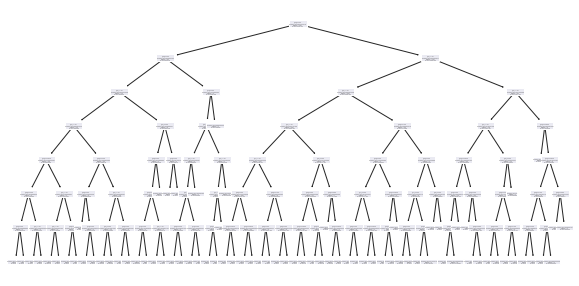

In [45]:
from sklearn.tree import plot_tree
plot_tree(tree);

In [46]:
from sklearn.tree import DecisionTreeRegressor, export_text
text_representation = export_text(tree)
print(text_representation)

|--- feature_18 <= 0.50
|   |--- feature_23 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_32 <= 2022.50
|   |   |   |   |   |--- feature_33 <= 25.00
|   |   |   |   |   |   |--- feature_30 <= 0.50
|   |   |   |   |   |   |   |--- value: [87395.75]
|   |   |   |   |   |   |--- feature_30 >  0.50
|   |   |   |   |   |   |   |--- value: [55630.11]
|   |   |   |   |   |--- feature_33 >  25.00
|   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |--- value: [135544.50]
|   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |--- value: [90504.96]
|   |   |   |   |--- feature_32 >  2022.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- value: [108630.08]
|   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |--- value: [186600.00]
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--

## Make predictions

Given one or more additional data points, you can find their predicted target value
with the function **`predict()`**.

In [47]:
entry = pd.DataFrame({'experience_level_Entry-level': [1],
                     'experience_level_Executive-level': [0],
                     'experience_level_Mid-level': [0],
                     'experience_level_Senior-level': [0],
                     'employment_type_Contractor': [0],
                     'employment_type_Freelancer': [0],
                     'employment_type_Full-Time': [1],
                     'employment_type_Part-Time': [0],
                     'job_title_Business Intelligence and Analytics': [0],
                     'job_title_Data Analyst': [0],
                     'job_title_Data Engineer': [0],
                     'job_title_Data Scientist': [1],
                     'job_title_Machine Learning Engineer': [0],
                     'job_title_Other': [0],
                     'job_title_Uncategorized': [0],
                     'employee_residence_Africa': [0],
                     'employee_residence_Asia': [0],
                     'employee_residence_Europe': [0],
                     'employee_residence_North America': [1],
                     'employee_residence_Oceania': [0],
                     'employee_residence_South America': [0],
                     'employee_residence_Uncategorized': [0],
                     'company_location_Africa': [0],
                     'company_location_Asia': [0],
                     'company_location_Europe': [1],
                     'company_location_North America': [0],
                     'company_location_Oceania': [0],
                     'company_location_South America': [0],
                     'company_location_Uncategorized': [0],
                     'company_size_Large': [1],
                     'company_size_Medium': [0],
                     'company_size_Small': [0],
                     'work_year': [2022],
                     'remote_ratio': [100]})


prediction = tree.predict(entry)

print(prediction)

[75315.2]


## Building a Random Forest Regressor using scikit-learn library

A [Random Forest Regressor](https://en.wikipedia.org/wiki/Random_forest) is a type of machine learning algorithm used for prediction tasks that involves making continuous numerical predictions. It works by combining multiple decision trees and using them to make predictions. Each decision tree is trained on a subset of the data and uses a random set of features to make splits, which helps to reduce overfitting and improve generalization performance. The predictions made by each individual tree are then averaged to produce the final prediction. 

In [48]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor

RandomForestRegressor(random_state=42)

[Random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is less prone to overfitting than a DecisionTreeRegressor, as it combines the predictions of multiple trees and thereby reduces the variance in the predictions.

In [49]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Assess the model's quality

The quality of a random forest regressor can be expressed as its _accuracy_ ,
obtained as follows:

In [50]:
score = rf_regressor.score(X_train, y_train)
print("R-squared train score:", score)

R-squared train score: 0.5206055889825777


In [51]:
score = rf_regressor.score(X_test, y_test)
print("R-squared test score:", score)

R-squared test score: 0.3341552217701538


## Make predictions

Given one or more additional data points, you can find their predicted target value
with the function **`predict()`**.

In [52]:
entry = pd.DataFrame({'experience_level_Entry-level': [0],
                     'experience_level_Executive-level': [0],
                     'experience_level_Mid-level': [0],
                     'experience_level_Senior-level': [1],
                     'employment_type_Contractor': [0],
                     'employment_type_Freelancer': [0],
                     'employment_type_Full-Time': [1],
                     'employment_type_Part-Time': [0],
                     'job_title_Business Intelligence and Analytics': [0],
                     'job_title_Data Analyst': [0],
                     'job_title_Data Engineer': [0],
                     'job_title_Data Scientist': [1],
                     'job_title_Machine Learning Engineer': [0],
                     'job_title_Other': [0],
                     'job_title_Uncategorized': [0],
                     'employee_residence_Africa': [0],
                     'employee_residence_Asia': [0],
                     'employee_residence_Europe': [1],
                     'employee_residence_North America': [0],
                     'employee_residence_Oceania': [0],
                     'employee_residence_South America': [0],
                     'employee_residence_Uncategorized': [0],
                     'company_location_Africa': [0],
                     'company_location_Asia': [0],
                     'company_location_Europe': [1],
                     'company_location_North America': [0],
                     'company_location_Oceania': [0],
                     'company_location_South America': [0],
                     'company_location_Uncategorized': [0],
                     'company_size_Large': [1],
                     'company_size_Medium': [0],
                     'company_size_Small': [0],
                     'work_year': [2023],
                     'remote_ratio': [100]})


prediction = rf_regressor.predict(entry)

print(prediction)

[87907.68311625]
